In [1]:
import os
import json
import glob
from matplotlib import pyplot as plt
import numpy as np

In [2]:
pwd

'/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations'

In [3]:
main_dir = '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations'

In [4]:
sub_dirs = sorted(glob.glob(os.path.join(main_dir, "4_*")))

print(f"sds:{sub_dirs}")

sds:['/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_10', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_11', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_12', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_13', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_14', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_15', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_16', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_4', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_5', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_6', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_7', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_8', '/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations/4_9']


In [5]:
casci_errors ={}
casscf_errors ={}

In [6]:
reference_dir =os.path.join(main_dir,"4_16")
ref_file = os.path.join(reference_dir,"new_data.json")

In [7]:
if not os.path.exists(ref_file):
    raise FileNotFoundError(f"Reference file not found:{Ref_file}")

with open(ref_file, 'r') as file:
    ref_data = json.load(file)
    ref_casci_energies = np.array(ref_data["return_results"]['casci_energies'])
    ref_casscf_energies = np.array(ref_data["return_results"]['casscf_energies'])
    print(f"rc{ref_casci_energies}")
    #print(f"rf{ref_casscf_energies}")
for sub_dir_path in sub_dirs:
    sub_dir_name = os.path.basename(sub_dir_path)
    active_space = int(sub_dir_name.split("_")[1])
    json_file = os.path.join(sub_dir_path,"new_data.json")
    if not os.path.exists(json_file):
        continue

    
        

    with open(json_file,'r') as file:
        data = json.load(file)
        casci_energies = np.array(data["return_results"]["casci_energies"])
        casscf_energies = np.array(data["return_results"]["casscf_energies"])
        #print(sub_dir_name)
        print(f" Active_space{active_space} casci_energies {casci_energies}")
        print(f" Active_space{active_space} casscf_energies {casscf_energies}")
    

        casci_error = np.array([ref - value for ref,value in zip(ref_casci_energies,casci_energies)])
        casscf_error = np.array([ref - value for ref,value in zip(ref_casscf_energies,casscf_energies)])
        #print(f"Active space{active_space} CASCI errors: {casci_error}")
        
       

        casci_errors[active_space] = casci_error[:, 0]
        casscf_errors[active_space] = casscf_error[:, 0]
        
        #print(type(casci_error))
        print(f"Active space{active_space} CASCI errors: {casci_error}")
        #print(f"Active space{active_space} CASSCF errors: {casscf_error}")


rc[[-7.91693623 -7.79950401 -7.7810515 ]
 [-7.98675588 -7.86976835 -7.84695037]
 [-8.01194232 -7.89695339 -7.87473808]
 [-8.01609601 -7.90530423 -7.88326511]
 [-8.01063805 -7.90683206 -7.88105255]
 [-8.00122676 -7.90626978 -7.87330998]
 [-7.99064631 -7.90495122 -7.86340366]
 [-7.98023138 -7.90318859 -7.8531101 ]
 [-7.97062574 -7.90097088 -7.84335645]
 [-7.9621471  -7.89819007 -7.8347941 ]]
 Active_space10 casci_energies [[-7.88537522 -7.76664521 -7.74102168]
 [-7.95585975 -7.83749616 -7.80662441]
 [-7.98117489 -7.86408508 -7.83523347]
 [-7.9852176  -7.87079057 -7.84572434]
 [-7.97960638 -7.8703035  -7.84607354]
 [-7.97002356 -7.86864305 -7.84015133]
 [-7.95915447 -7.86718615 -7.83104052]
 [-7.94821544 -7.8656755  -7.82082572]
 [-7.93778283 -7.86375575 -7.81063714]
 [-7.92817221 -7.86119496 -7.80124714]]
 Active_space10 casscf_energies [[-7.91618006 -7.79861781 -7.78014864]
 [-7.98597807 -7.86887228 -7.84607888]
 [-8.01111471 -7.89601314 -7.87403669]
 [-8.01535124 -7.90446785 -7.8826530

In [8]:
casci_min_max_diff = {}
casscf_min_max_diff = {} 

for active_space,errors in casci_errors.items():
    casci_min_max_diff[active_space] = np.max(errors) - np.min(errors)
    #print(f"CASCI - Active space: {active_space}, Errors: {errors}")
 

for active_space,errors in casscf_errors.items():
    casscf_min_max_diff[active_space] = np.max(errors) - np.min(errors)
    #print(f"CASSCF - Active space: {active_space}, Errors: {errors}")

    #print(f"CASCI min-max differences: {casci_min_max_diff}")
    #print(f"CASSCF min-max differences: {casscf_min_max_diff}")

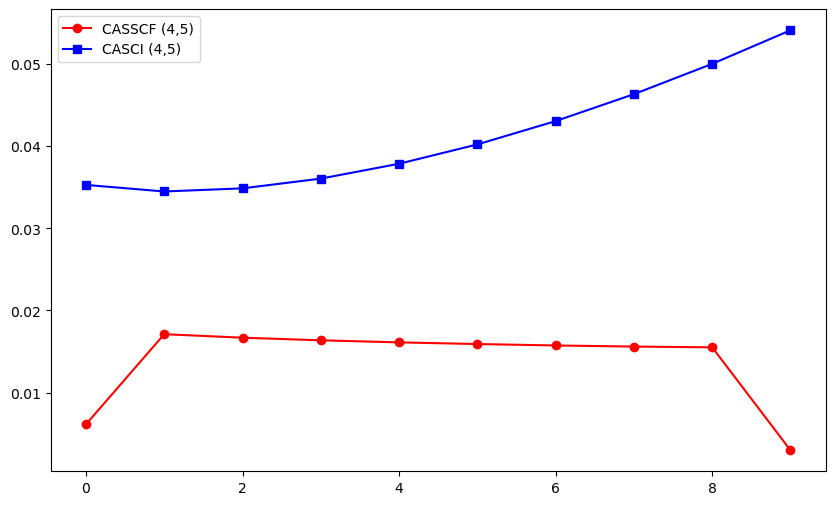

In [49]:
plt.figure(figsize=(10, 6))  # Sets the plot size to 10 inches wide by 6 inches tall

for i in range(5,6
              ):
    plt.plot(np.abs(casscf_errors[i]), "r-o", label=f"CASSCF (4,{i})")
    plt.plot(np.abs(casci_errors[i]), "b-s", label=f"CASCI (4,{i})")

plt.legend()  # This will display a legend for each line
plt.show()



a:[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


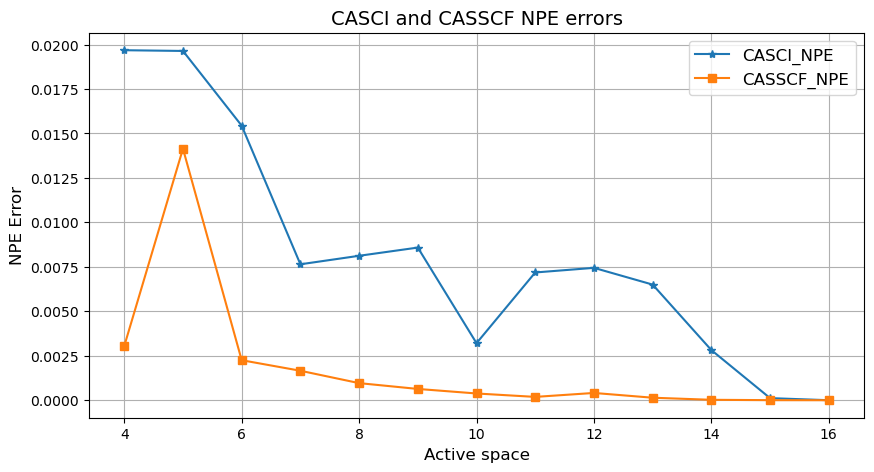

In [10]:
plt.figure(figsize =(10,5))
plt.plot(
    sorted(casci_min_max_diff.keys()),
    [casci_min_max_diff[NPE_val] for NPE_val in sorted(casci_min_max_diff.keys())],
    label ="CASCI_NPE", marker ='*'
)


plt.plot(
     sorted(casscf_min_max_diff.keys()),
    [casscf_min_max_diff[NPE_val] for NPE_val in sorted(casscf_min_max_diff.keys())],
    label ="CASSCF_NPE", marker ='s'
)
a = sorted(casscf_min_max_diff.keys())
print(f"a:{a}")

#print(f"cassci: {casci_min_max_diff}")
#print(f"casscf: {casscf_min_max_diff}")

plt.legend(fontsize=12)
plt.grid(True)
plt.title("CASCI and CASSCF NPE errors", fontsize=14)
plt.xlabel("Active space", fontsize=12)
plt.ylabel("NPE Error", fontsize=12)
plt.show()